# 흡연유무 분류 모델

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## 1. 데이터 불러오기 및 확인

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
data=pd.read_csv('C:/Users/wandong/OneDrive/바탕 화면/dongguk/4-2/통계모델링2/기말프로젝트/data/health.csv')

In [4]:
data.describe()

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999917.000000,999789.000000,999790.000000,999810.000000,999811.000000,992655.000000,992655.000000,992588.000000,425059.000000,425055.000000,425055.000000,417432.000000,992586.000000,987439.000000,992593.000000,992595.000000,992595.000000,992594.000000,999630.000000,999832.000000,1000000.000000,316766.000000,0.0,0.0,0.0,316767.000000
mean,2021.0,2.500037e+06,34.008688,1.499871,11.924016,161.046600,63.126275,82.083689,0.485496,0.487202,1.046653,1.044954,124.799935,76.672873,104.005074,198.747915,131.302629,57.039856,116.261449,13.714809,1.122807,0.269248,27.744910,26.775772,37.429200,1.548162,0.577062,0.316767,0.164137,NaN,NaN,NaN,0.574217
std,0.0,1.442961e+06,12.508555,0.500000,2.195582,9.205518,12.456028,9.743215,0.725347,0.722238,0.220752,0.217036,14.821133,10.099609,24.979984,43.769043,99.344578,16.686704,39.384127,1.581361,0.492017,0.541013,22.182526,26.008501,71.566104,0.782812,0.494026,0.465216,0.370400,NaN,NaN,NaN,0.587670
min,2021.0,1.000000e+00,11.000000,1.000000,9.000000,130.000000,30.000000,32.000000,0.000000,0.000000,1.000000,1.000000,65.000000,30.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,2021.0,1.250856e+06,27.000000,1.000000,10.000000,155.000000,55.000000,75.000000,0.000000,0.000000,1.000000,1.000000,115.000000,70.000000,91.000000,170.000000,75.000000,46.000000,89.000000,13.000000,1.000000,0.000000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2021.0,2.500198e+06,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.000000,0.000000,1.000000,1.000000,124.000000,77.000000,99.000000,198.000000,107.000000,55.000000,115.000000,14.000000,1.000000,0.000000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
75%,2021.0,3.751162e+06,44.000000,2.000000,13.000000,170.000000,70.000000,88.000000,1.000000,1.000000,1.000000,1.000000,134.000000,83.000000,109.000000,226.000000,157.000000,66.000000,141.000000,15.000000,1.000000,1.000000,30.000000,31.000000,39.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000
max,2021.0,4.999999e+06,49.000000,2.000000,18.000000,195.000000,135.000000,450.000000,9.000000,9.000000,3.000000,3.000000,253.000000,202.000000,838.000000,2625.000000,5858.000000,909.000000,2584.000000,24.000000,6.000000,93.000000,8138.000000,9999.000000,9999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000


## 2. raw 데이터 데이터 개형 확인하기

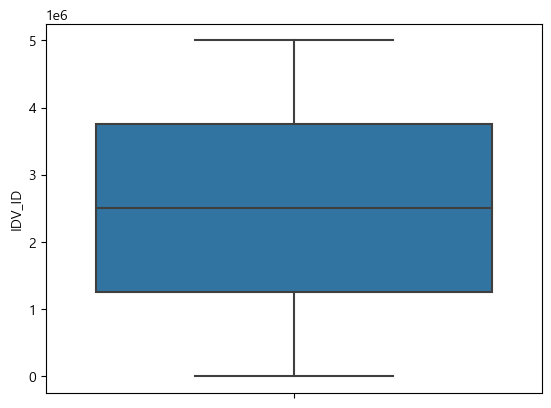

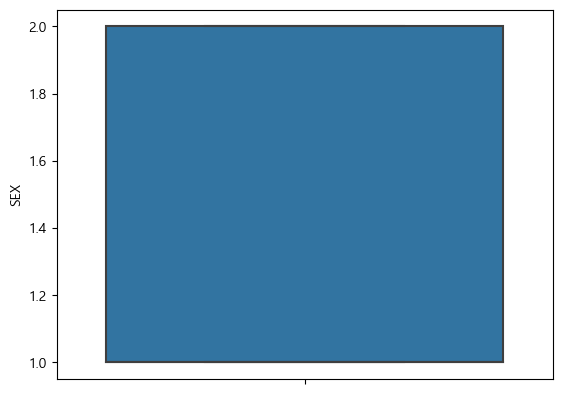

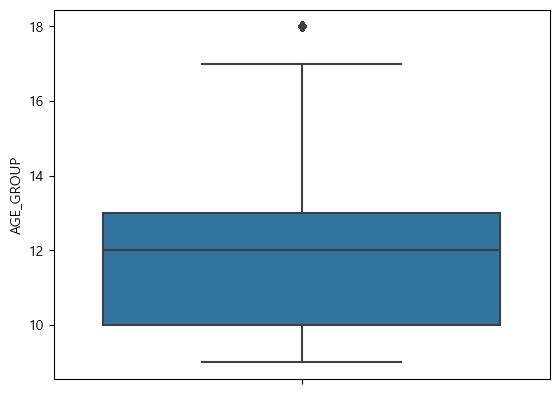

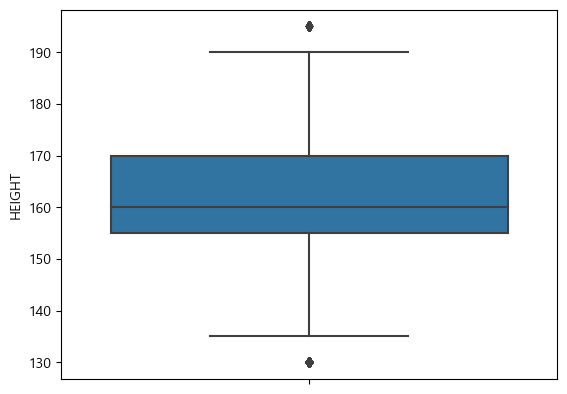

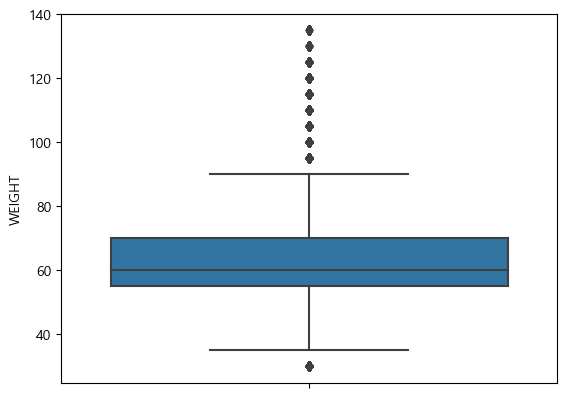

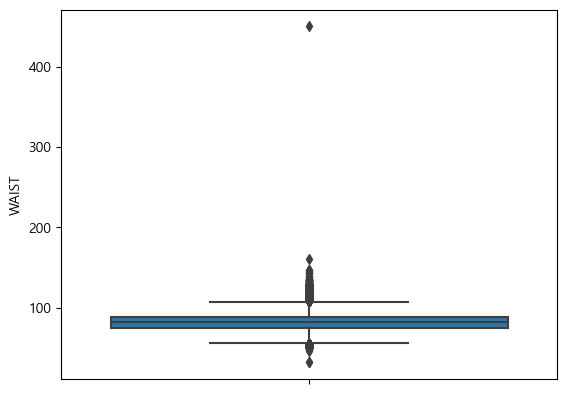

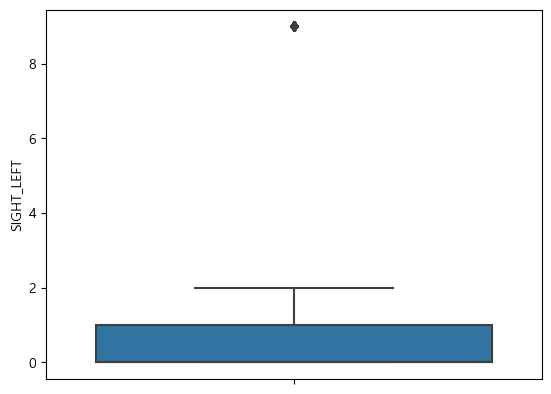

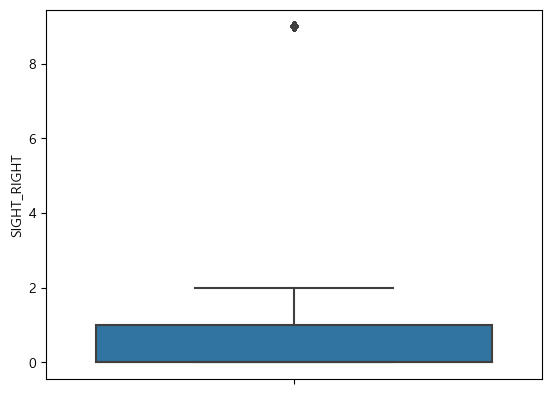

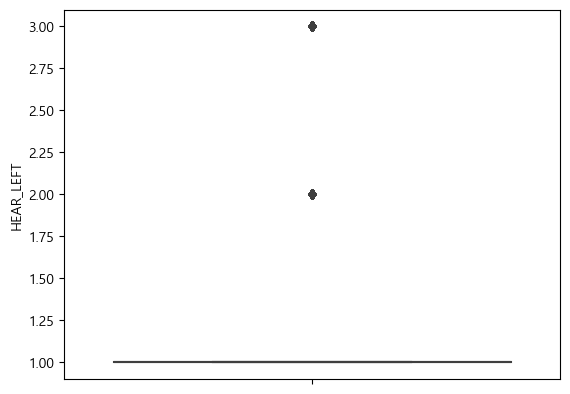

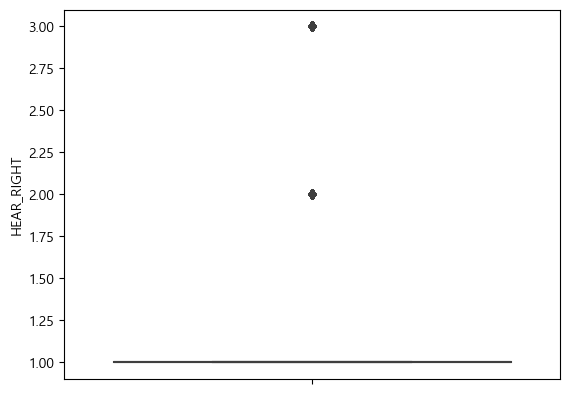

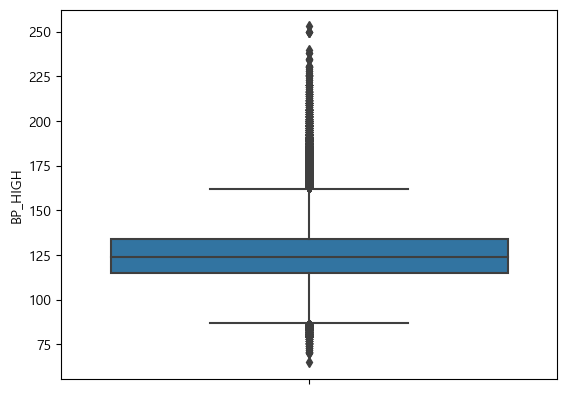

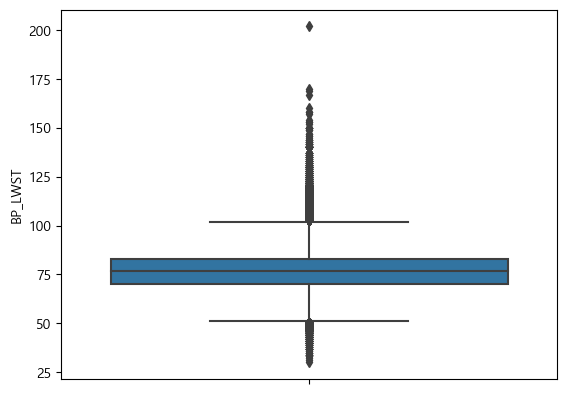

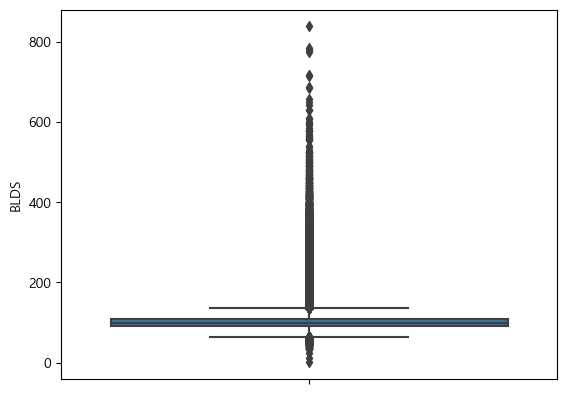

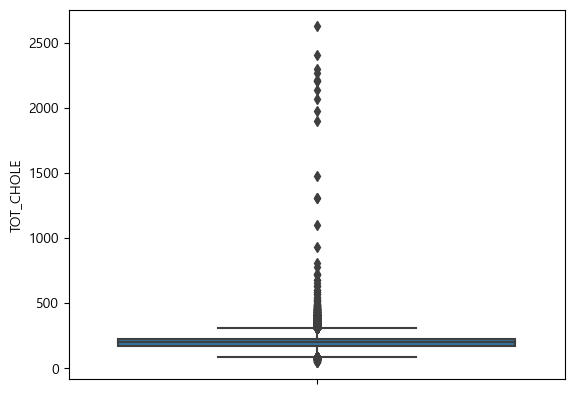

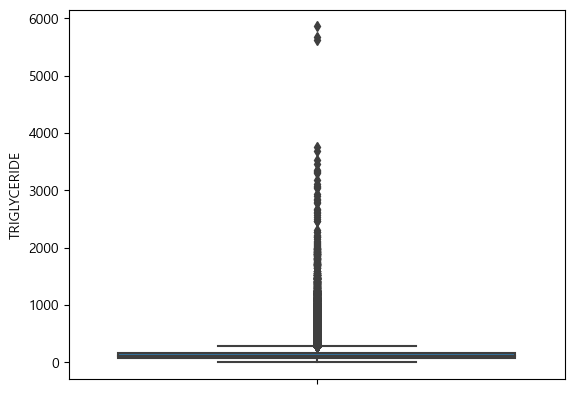

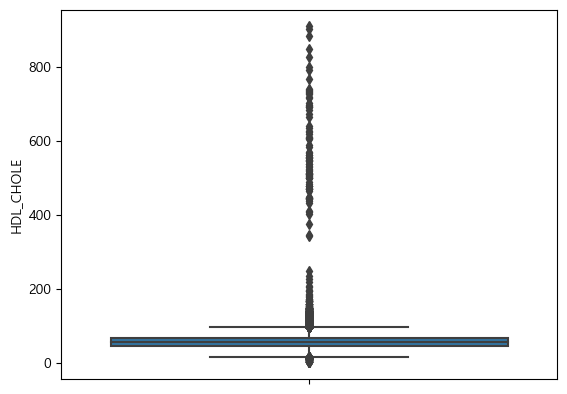

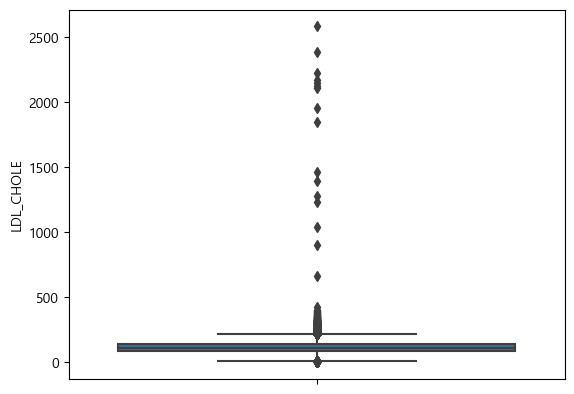

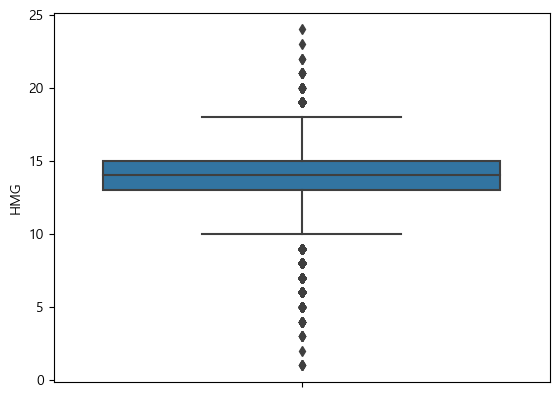

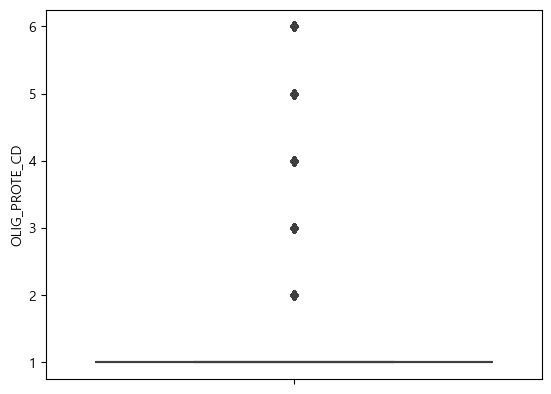

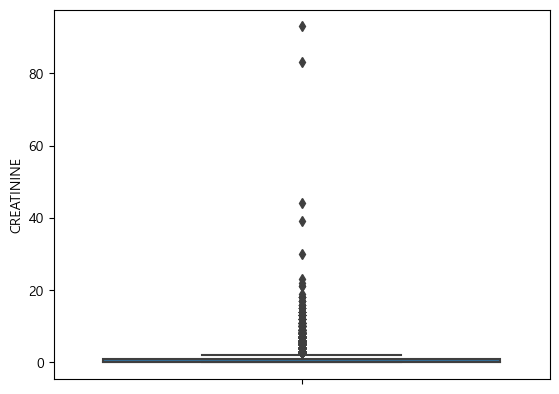

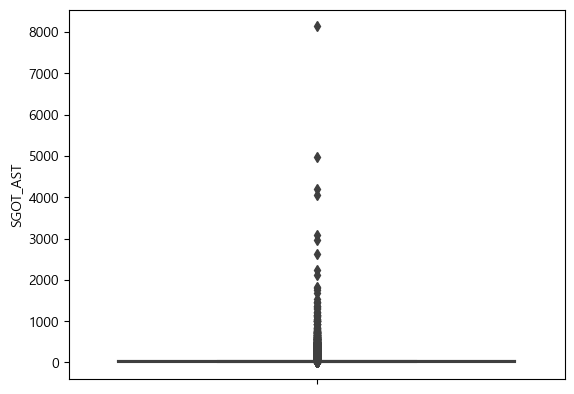

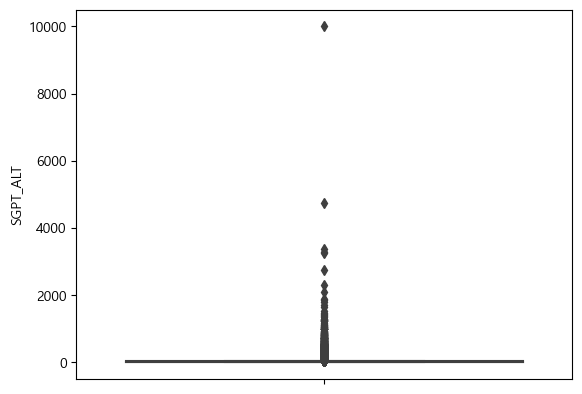

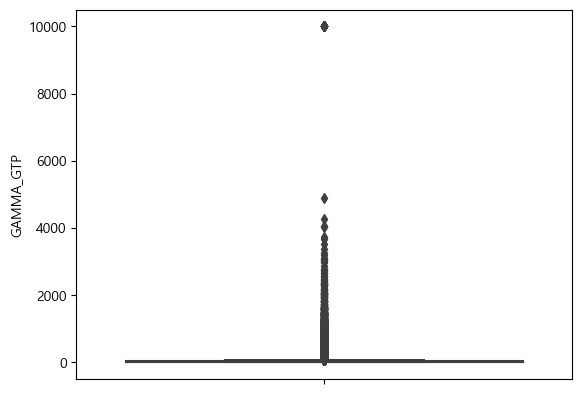

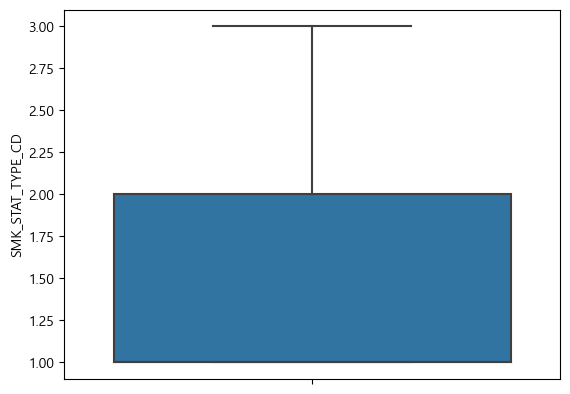

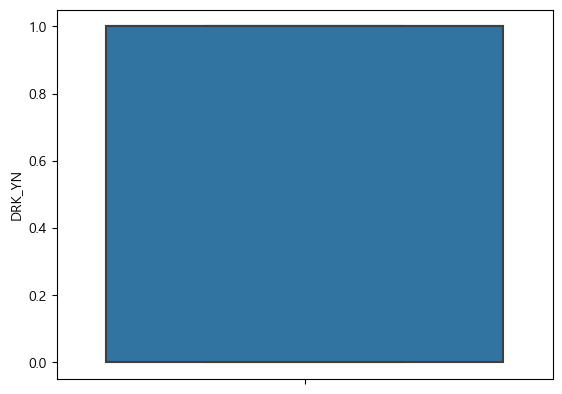

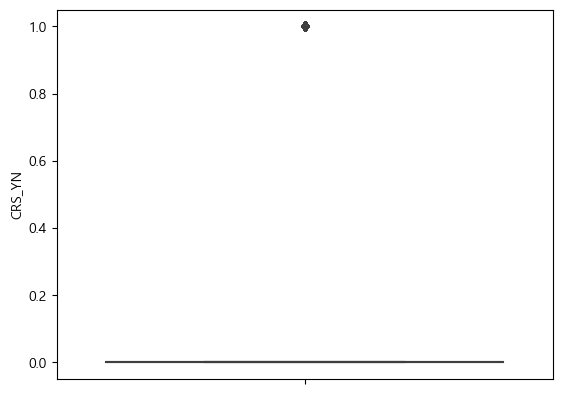

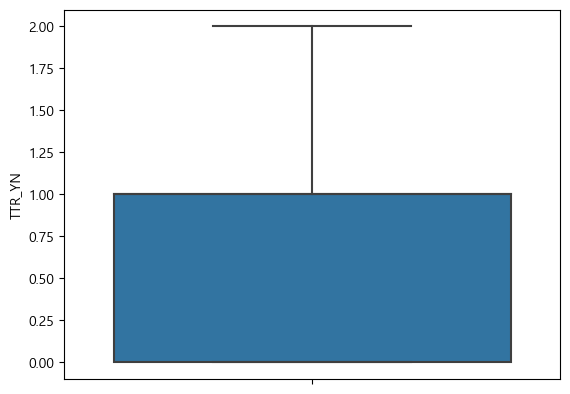

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 위에서 주어진 리스트를 그대로 사용
columns = [ 'IDV_ID', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
        'CRS_YN', 'TTR_YN']

# for 문을 사용하여 각각의 boxplot 그리기
for i in columns:
    sns.boxplot(y=i, data=data)
    plt.show()


### 결측치의 비율 확인 

- 결손치, 치아마모증, 사랑니에 대한 데이터 존재하지 않음(제거)
- 약 50%의 콜레스테롤 데이터가 존재 하지않음
- 1%의 요단백 데이터 x
- 70%의 치아마모증 데이터 x

- 의료데이터이니 만큼 평균값 등의 대체가 어려워 보임 .. 그러면 30%만 가져가야하나?
- 약 30만개의 데이터라 값이 적진 않음

In [6]:
data.isna().sum()

HCHK_YEAR                  0
IDV_ID                     0
SIDO                       0
SEX                        0
AGE_GROUP                  0
HEIGHT                     0
WEIGHT                     0
WAIST                     83
SIGHT_LEFT               211
SIGHT_RIGHT              210
HEAR_LEFT                190
HEAR_RIGHT               189
BP_HIGH                 7345
BP_LWST                 7345
BLDS                    7412
TOT_CHOLE             574941
TRIGLYCERIDE          574945
HDL_CHOLE             574945
LDL_CHOLE             582568
HMG                     7414
OLIG_PROTE_CD          12561
CREATININE              7407
SGOT_AST                7405
SGPT_ALT                7405
GAMMA_GTP               7406
SMK_STAT_TYPE_CD         370
DRK_YN                   168
HCHK_OE_INSPEC_YN          0
CRS_YN                683234
TTH_MSS_YN           1000000
ODT_TRB_YN           1000000
WSDM_DIS_YN          1000000
TTR_YN                683233
DATA_STD_DT                0
dtype: int64

In [7]:
dataNew=data.dropna(subset=['CRS_YN'])
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316766 entries, 63488 to 999998
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HCHK_YEAR          316766 non-null  int64  
 1   IDV_ID             316766 non-null  int64  
 2   SIDO               316766 non-null  int64  
 3   SEX                316766 non-null  int64  
 4   AGE_GROUP          316766 non-null  int64  
 5   HEIGHT             316766 non-null  int64  
 6   WEIGHT             316766 non-null  int64  
 7   WAIST              316752 non-null  float64
 8   SIGHT_LEFT         316711 non-null  float64
 9   SIGHT_RIGHT        316708 non-null  float64
 10  HEAR_LEFT          316716 non-null  float64
 11  HEAR_RIGHT         316717 non-null  float64
 12  BP_HIGH            316758 non-null  float64
 13  BP_LWST            316758 non-null  float64
 14  BLDS               316749 non-null  float64
 15  TOT_CHOLE          130608 non-null  float64
 16

## 3. 치아데이터 처리 = dataNew
- 치아 우식증 결측치 행 제거
- 치아마모증, 사랑니, 구강검진여부 변수 자체를 제거

</br>

- 추가로 연도, 지역 열 제거

In [8]:
dataNew.columns

Index(['HCHK_YEAR', 'IDV_ID', 'SIDO', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
       'HCHK_OE_INSPEC_YN', 'CRS_YN', 'TTH_MSS_YN', 'ODT_TRB_YN',
       'WSDM_DIS_YN', 'TTR_YN', 'DATA_STD_DT'],
      dtype='object')

In [9]:
Columns = [ 'IDV_ID', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
        'CRS_YN', 'TTR_YN', 'DATA_STD_DT']
dataNew=dataNew[Columns]


In [10]:
dataNew.isna().sum()

IDV_ID                   0
SEX                      0
AGE_GROUP                0
HEIGHT                   0
WEIGHT                   0
WAIST                   14
SIGHT_LEFT              55
SIGHT_RIGHT             58
HEAR_LEFT               50
HEAR_RIGHT              49
BP_HIGH                  8
BP_LWST                  8
BLDS                    17
TOT_CHOLE           186158
TRIGLYCERIDE        186158
HDL_CHOLE           186158
LDL_CHOLE           188611
HMG                     18
OLIG_PROTE_CD         1360
CREATININE              17
SGOT_AST                17
SGPT_ALT                17
GAMMA_GTP               17
SMK_STAT_TYPE_CD        88
DRK_YN                  25
CRS_YN                   0
TTR_YN                   0
DATA_STD_DT              0
dtype: int64

## 4. 나머지 데이터에서 결측치 제거 = dataNew2

In [11]:
dataNew2=dataNew.dropna(subset=['TOT_CHOLE','LDL_CHOLE','WAIST','SIGHT_LEFT','SIGHT_RIGHT',
                                'HEAR_LEFT','HEAR_RIGHT',
                               'BP_HIGH','BP_LWST','BLDS','HMG','OLIG_PROTE_CD','CREATININE',
                               'SGOT_AST','SGPT_ALT','GAMMA_GTP','SMK_STAT_TYPE_CD','DRK_YN'])
dataNew2.isna().sum()

IDV_ID              0
SEX                 0
AGE_GROUP           0
HEIGHT              0
WEIGHT              0
WAIST               0
SIGHT_LEFT          0
SIGHT_RIGHT         0
HEAR_LEFT           0
HEAR_RIGHT          0
BP_HIGH             0
BP_LWST             0
BLDS                0
TOT_CHOLE           0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGOT_AST            0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    0
DRK_YN              0
CRS_YN              0
TTR_YN              0
DATA_STD_DT         0
dtype: int64

### 모든 결측치를 제거하고 사용시 127417개의 데이터가 남음

In [12]:
dataNew2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127417 entries, 574476 to 999998
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDV_ID            127417 non-null  int64  
 1   SEX               127417 non-null  int64  
 2   AGE_GROUP         127417 non-null  int64  
 3   HEIGHT            127417 non-null  int64  
 4   WEIGHT            127417 non-null  int64  
 5   WAIST             127417 non-null  float64
 6   SIGHT_LEFT        127417 non-null  float64
 7   SIGHT_RIGHT       127417 non-null  float64
 8   HEAR_LEFT         127417 non-null  float64
 9   HEAR_RIGHT        127417 non-null  float64
 10  BP_HIGH           127417 non-null  float64
 11  BP_LWST           127417 non-null  float64
 12  BLDS              127417 non-null  float64
 13  TOT_CHOLE         127417 non-null  float64
 14  TRIGLYCERIDE      127417 non-null  float64
 15  HDL_CHOLE         127417 non-null  float64
 16  LDL_CHOLE      

In [13]:
dataNew2.describe()

,IDV_ID,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN
count,1.274170e+05,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000
mean,2.504982e+06,1.495774,11.607289,161.520951,63.476028,82.087500,0.483585,0.486984,1.056319,1.056052,122.907595,75.811485,102.863597,199.295479,122.680396,56.335167,118.642002,13.730578,1.110739,0.295141,27.067354,26.404310,35.425501,1.551975,0.607698,0.166289,0.583227
std,1.443322e+06,0.499984,2.184445,9.109742,12.450497,9.730165,0.661019,0.669166,0.234420,0.234182,14.484617,9.838136,22.652443,40.666472,67.602462,14.196294,37.256128,1.555774,0.475654,0.502606,14.890283,34.811532,49.163948,0.771858,0.488265,0.372341,0.589043
min,4.500000e+01,1.000000,9.000000,130.000000,30.000000,50.000000,0.000000,0.000000,1.000000,1.000000,76.000000,36.000000,1.000000,69.000000,6.000000,5.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1.254092e+06,1.000000,10.000000,155.000000,55.000000,75.000000,0.000000,0.000000,1.000000,1.000000,113.000000,70.000000,91.000000,172.000000,74.000000,46.000000,93.000000,13.000000,1.000000,0.000000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000
50%,2.510841e+06,1.000000,11.000000,160.000000,60.000000,82.000000,0.000000,0.000000,1.000000,1.000000,122.000000,76.000000,98.000000,198.000000,105.000000,54.000000,118.000000,14.000000,1.000000,0.000000,24.000000,21.000000,23.000000,1.000000,1.000000,0.000000,1.000000
75%,3.755478e+06,2.000000,13.000000,170.000000,70.000000,88.000000,1.000000,1.000000,1.000000,1.000000,132.000000,82.000000,108.000000,226.000000,154.000000,65.000000,143.000000,15.000000,1.000000,1.000000,30.000000,30.000000,38.000000,2.000000,1.000000,0.000000,1.000000
max,4.999999e+06,2.000000,18.000000,195.000000,135.000000,143.000000,9.000000,9.000000,3.000000,3.000000,230.000000,150.000000,578.000000,463.000000,399.000000,193.000000,1468.000000,20.000000,6.000000,23.000000,738.000000,9999.000000,3737.000000,3.000000,1.000000,1.000000,2.000000


## 5. BMI 변수 추가

In [14]:
dataNew2['BMI']=dataNew2['WEIGHT']/(dataNew2['HEIGHT']*dataNew2['HEIGHT'])*10000

C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\1667995892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNew2['BMI']=dataNew2['WEIGHT']/(dataNew2['HEIGHT']*dataNew2['HEIGHT'])*10000


In [15]:
dataNew2[['HEIGHT','WEIGHT','BMI']]

,HEIGHT,WEIGHT,BMI
574476,150,75,33.333333
574479,160,65,25.390625
574485,170,70,24.221453
574486,145,45,21.403092
574487,165,70,25.711662
...,...,...,...
999989,160,35,13.671875
999993,170,80,27.681661
999994,180,80,24.691358
999995,150,60,26.666667


## 6. 시력 9.0 == 0 으로처리

In [16]:
dataNew2[dataNew2['SIGHT_LEFT']==9]=0
dataNew2[dataNew2['SIGHT_RIGHT']==9]=0
dataNew2[['SIGHT_LEFT','SIGHT_RIGHT']]

C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\2317631657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNew2[dataNew2['SIGHT_LEFT']==9]=0
C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\2317631657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNew2[dataNew2['SIGHT_RIGHT']==9]=0


,SIGHT_LEFT,SIGHT_RIGHT
574476,0.0,0.0
574479,1.0,1.0
574485,1.0,1.0
574486,1.0,1.0
574487,1.0,1.0
...,...,...
999989,0.0,1.0
999993,0.0,0.0
999994,0.0,0.0
999995,0.0,0.0


In [17]:
dataNew2.describe()

,IDV_ID,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,BMI
count,1.274170e+05,127417.000000,127417.000000,127417.000000,127417.00000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000,127417.000000
mean,2.493627e+06,1.489377,11.545908,160.769246,63.18164,81.693165,0.460425,0.462301,1.050778,1.050613,122.313820,75.454610,102.366756,198.410385,122.062268,56.087139,118.127416,13.666591,1.104790,0.293101,26.933486,26.281077,35.225449,1.544401,0.605233,0.165315,0.580472,24.099148
std,1.450080e+06,0.509176,2.314971,14.290579,13.15779,11.209448,0.505919,0.504945,0.243447,0.243368,16.701639,11.093916,23.655837,42.766908,67.934139,14.673181,38.023000,1.812956,0.478134,0.500579,14.956467,34.830312,49.048820,0.777193,0.488802,0.371466,0.588826,3.945761
min,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.236990e+06,1.000000,10.000000,155.000000,55.00000,75.000000,0.000000,0.000000,1.000000,1.000000,112.000000,70.000000,91.000000,171.000000,73.000000,46.000000,92.000000,13.000000,1.000000,0.000000,20.000000,15.000000,16.000000,1.000000,0.000000,0.000000,0.000000,21.484375
50%,2.500299e+06,1.000000,11.000000,160.000000,60.00000,82.000000,0.000000,0.000000,1.000000,1.000000,122.000000,76.000000,98.000000,198.000000,105.000000,54.000000,117.000000,14.000000,1.000000,0.000000,24.000000,21.000000,23.000000,1.000000,1.000000,0.000000,1.000000,23.875115
75%,3.750035e+06,2.000000,13.000000,170.000000,70.00000,88.000000,1.000000,1.000000,1.000000,1.000000,132.000000,82.000000,107.000000,225.000000,153.000000,65.000000,142.000000,15.000000,1.000000,1.000000,30.000000,30.000000,38.000000,2.000000,1.000000,0.000000,1.000000,26.122449
max,4.999999e+06,2.000000,18.000000,195.000000,135.00000,143.000000,2.000000,2.000000,3.000000,3.000000,230.000000,150.000000,578.000000,463.000000,399.000000,193.000000,1468.000000,20.000000,6.000000,23.000000,738.000000,9999.000000,3737.000000,3.000000,1.000000,1.000000,2.000000,47.866805


## 7. 극단적 이상치 처리 (3*iqr) = datNew3

In [18]:
Q1 = dataNew2.quantile(0.25)
Q3 = dataNew2.quantile(0.75)
IQR = Q3-Q1

dataNew3 = dataNew2[~((dataNew2<(Q1-3*IQR))|(dataNew2>(Q3+3*IQR))).any(axis=1)]

C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\3218250068.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataNew2.quantile(0.25)
C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\3218250068.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataNew2.quantile(0.75)
C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\3218250068.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataNew3 = dataNew2[~((dataNew2<(Q1-3*IQR))|(dataNew2>(Q3+3*IQR))).any

In [19]:
dataNew3

,IDV_ID,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,DATA_STD_DT,BMI
574479,1346180,2,9,160,65,74.0,1.0,1.0,1.0,1.0,110.0,70.0,105.0,203.0,82.0,75.0,112.0,12.0,1.0,1.0,21.0,16.0,14.0,1.0,1.0,0.0,0.0,2022-08-11,25.390625
574485,2808654,1,13,170,70,76.0,1.0,1.0,1.0,1.0,126.0,76.0,96.0,182.0,97.0,86.0,76.0,14.0,1.0,0.0,21.0,16.0,59.0,3.0,1.0,0.0,0.0,2022-08-11,24.221453
574486,860528,2,12,145,45,70.0,1.0,1.0,1.0,1.0,112.0,72.0,94.0,157.0,103.0,47.0,89.0,14.0,1.0,0.0,21.0,16.0,19.0,1.0,1.0,0.0,1.0,2022-08-11,21.403092
574487,2000852,1,13,165,70,94.0,1.0,1.0,1.0,1.0,120.0,78.0,109.0,246.0,121.0,55.0,167.0,15.0,1.0,1.0,21.0,16.0,28.0,3.0,1.0,0.0,2.0,2022-08-11,25.711662
574514,277619,2,12,155,50,83.0,0.0,1.0,1.0,1.0,110.0,70.0,101.0,231.0,144.0,40.0,162.0,12.0,1.0,1.0,21.0,16.0,23.0,1.0,0.0,0.0,0.0,2022-08-11,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998832,2010174,2,13,160,60,79.0,0.0,0.0,1.0,1.0,145.0,77.0,96.0,226.0,122.0,65.0,136.0,14.0,1.0,0.0,17.0,2.0,19.0,1.0,0.0,0.0,0.0,2022-08-11,23.437500
999059,3564289,1,12,175,75,84.0,0.0,1.0,1.0,1.0,111.0,67.0,112.0,170.0,285.0,47.0,66.0,14.0,1.0,1.0,20.0,3.0,38.0,1.0,1.0,0.0,0.0,2022-08-11,24.489796
999250,2188352,2,10,155,45,70.0,0.0,0.0,1.0,1.0,109.0,70.0,87.0,150.0,89.0,64.0,68.0,12.0,1.0,0.0,16.0,3.0,11.0,1.0,0.0,0.0,1.0,2022-08-11,18.730489
999888,1004700,2,11,145,55,79.0,0.0,0.0,1.0,1.0,116.0,75.0,87.0,151.0,113.0,36.0,92.0,10.0,1.0,0.0,15.0,2.0,13.0,1.0,0.0,0.0,0.0,2022-08-11,26.159334


## 8. 최종데이터의 개형 확인

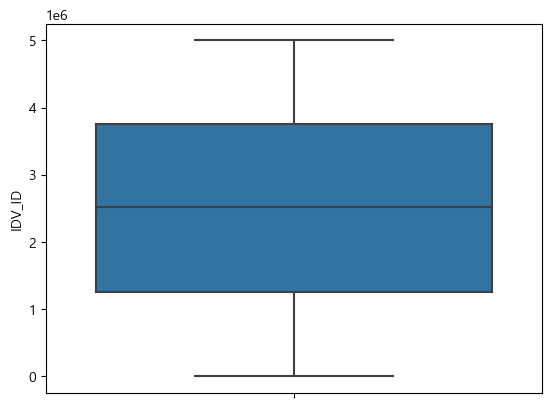

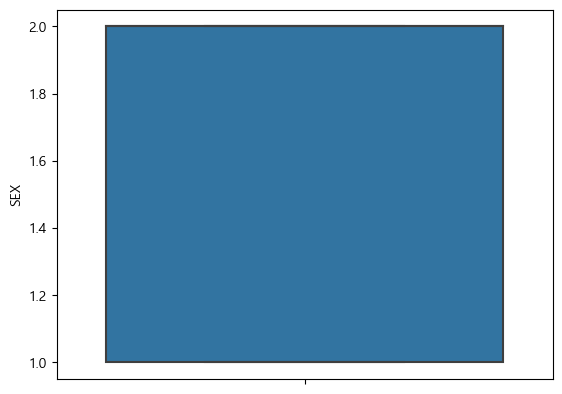

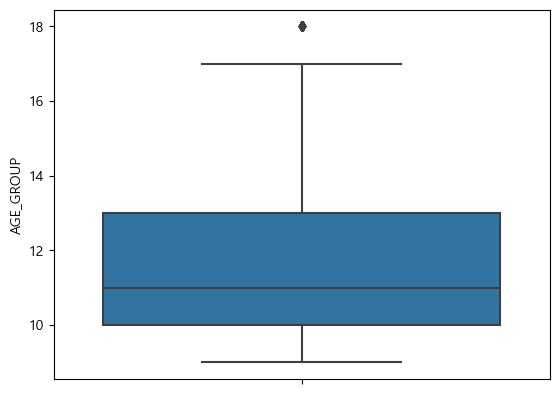

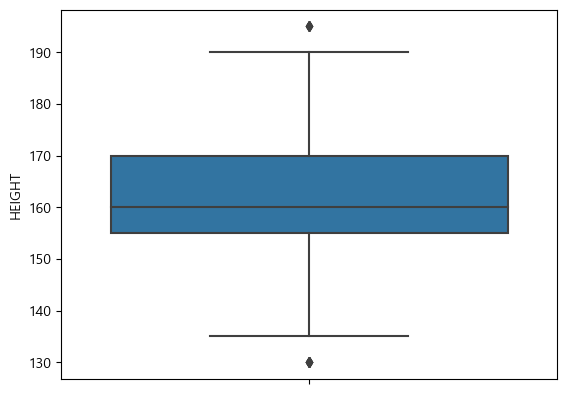

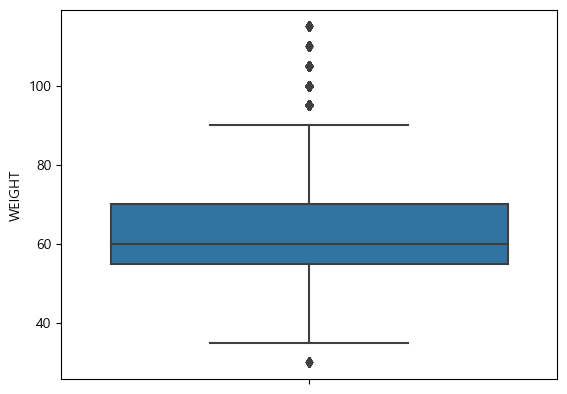

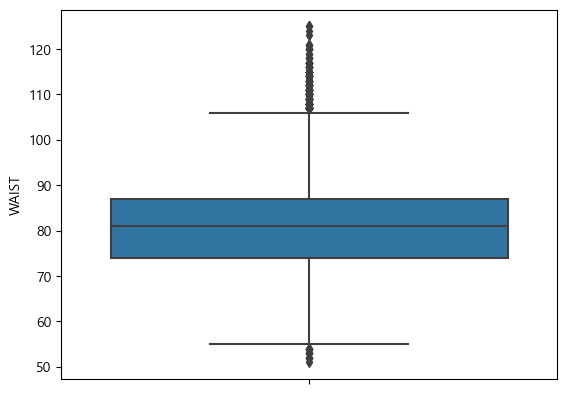

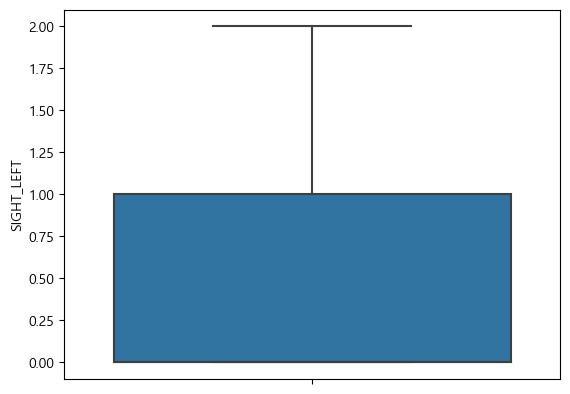

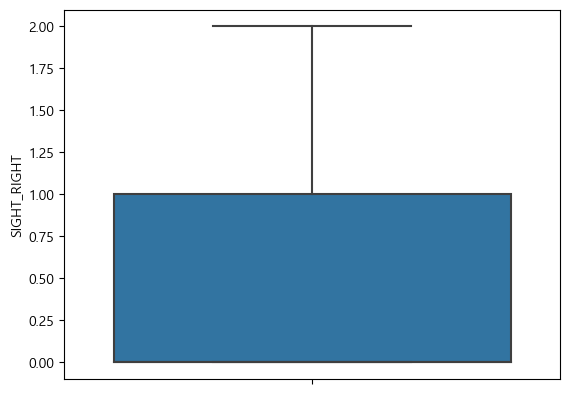

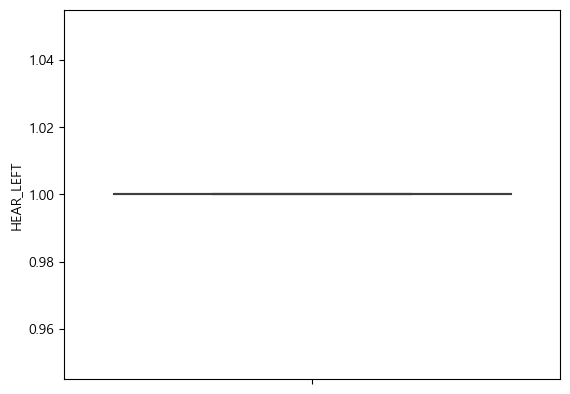

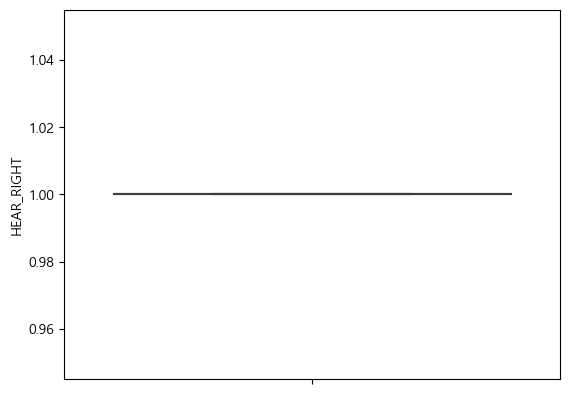

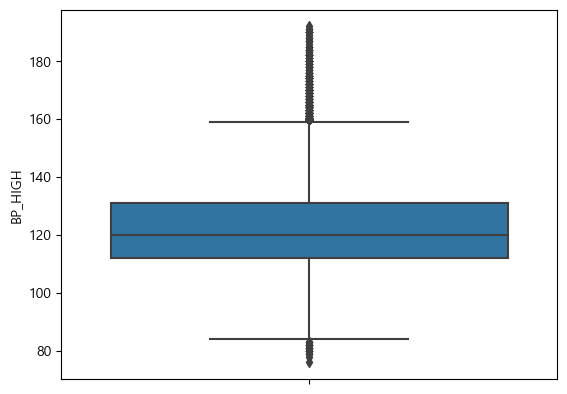

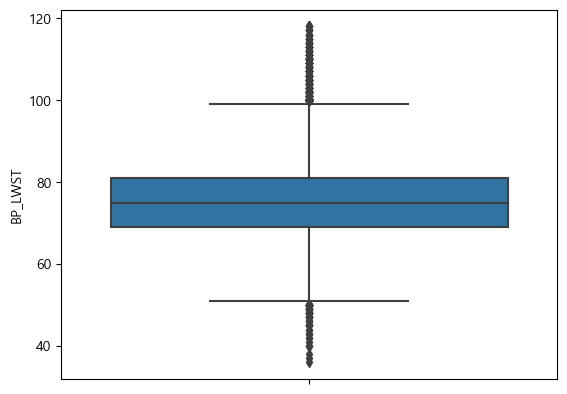

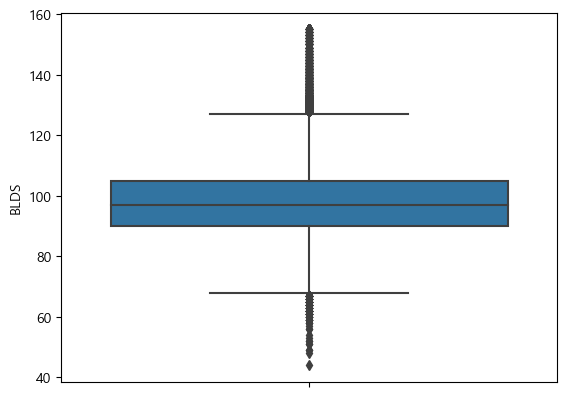

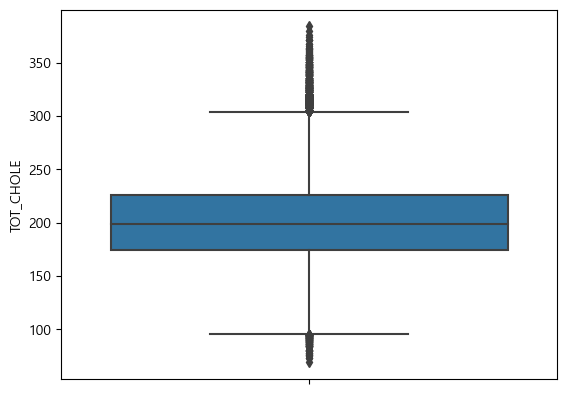

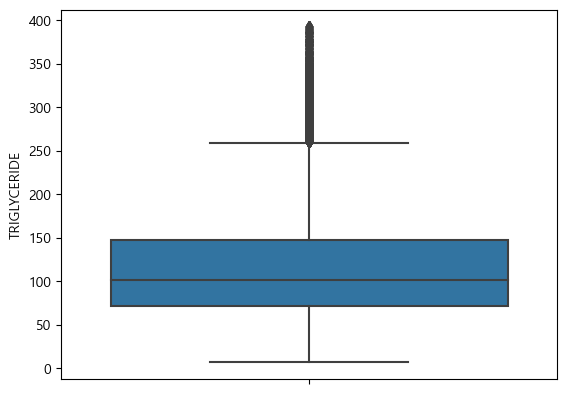

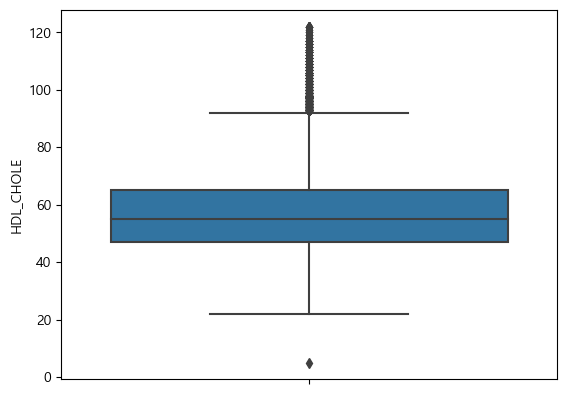

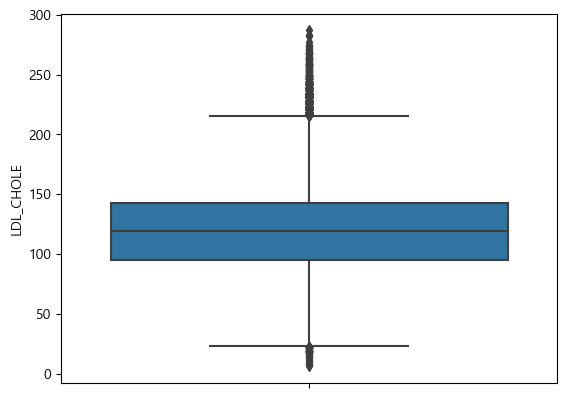

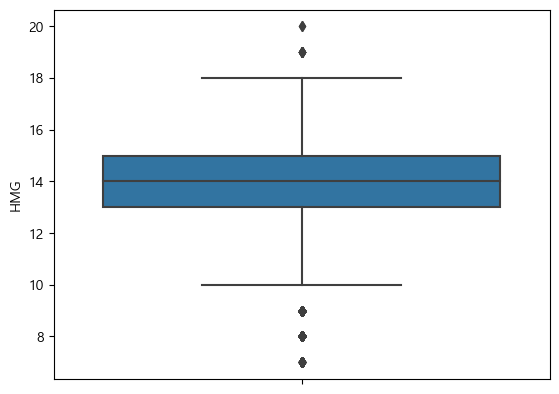

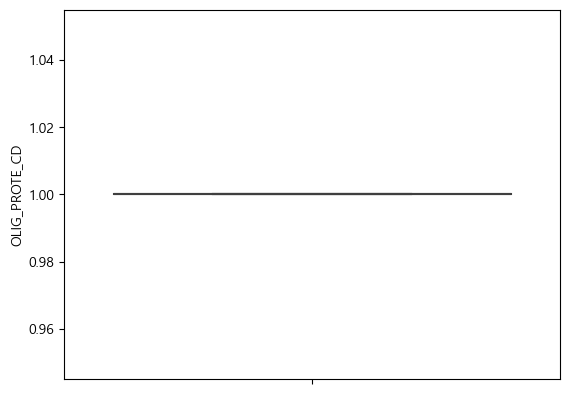

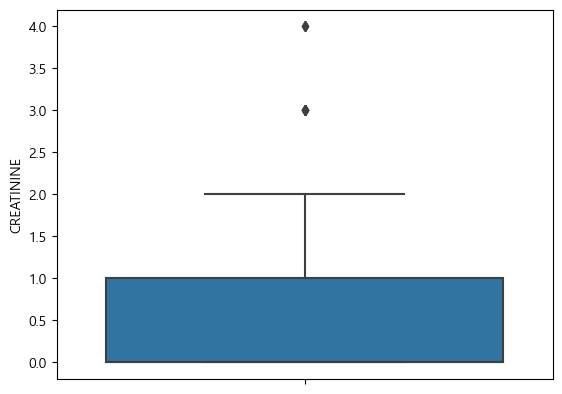

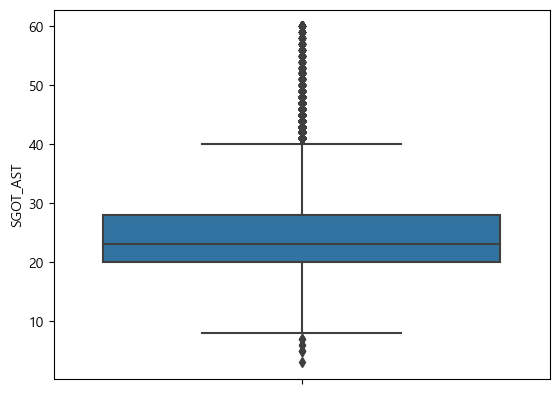

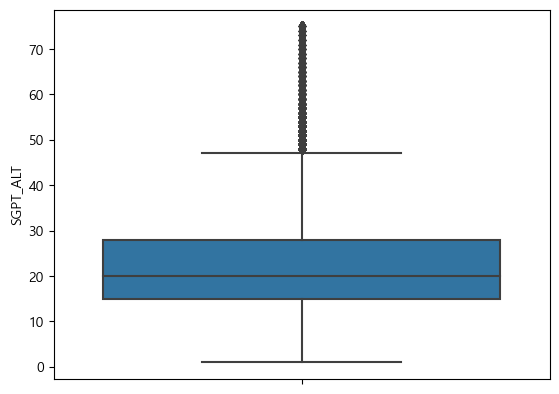

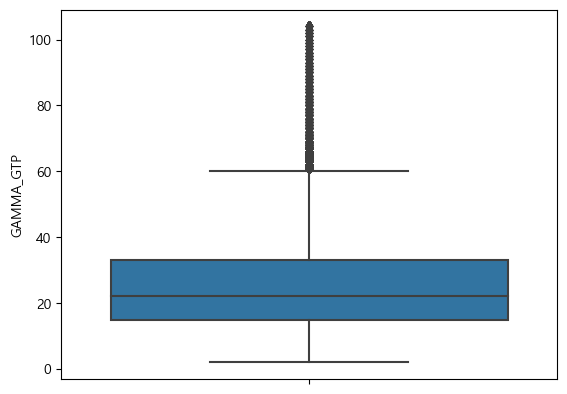

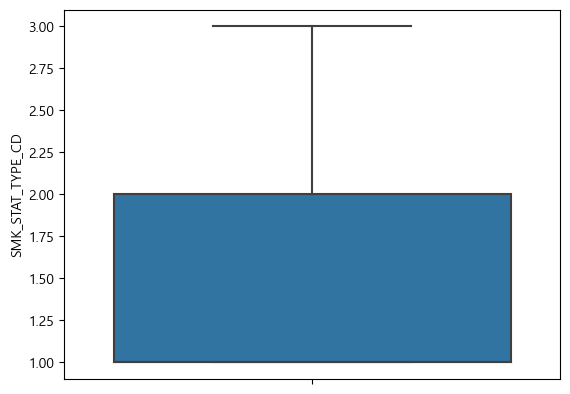

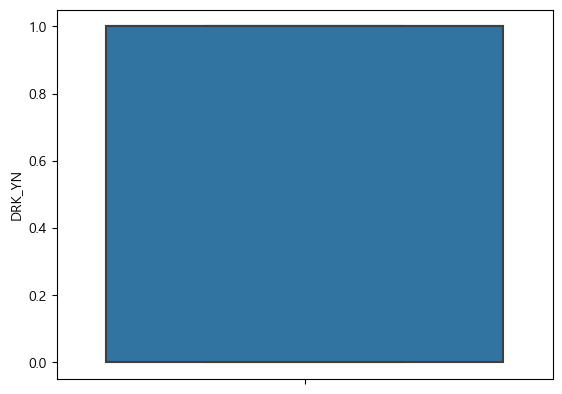

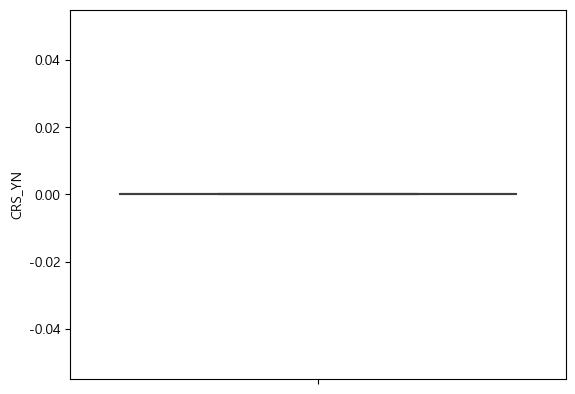

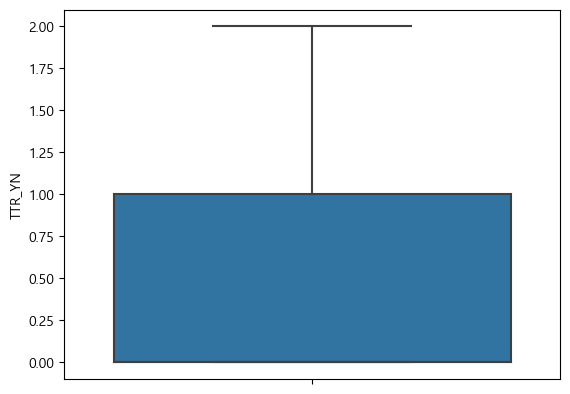

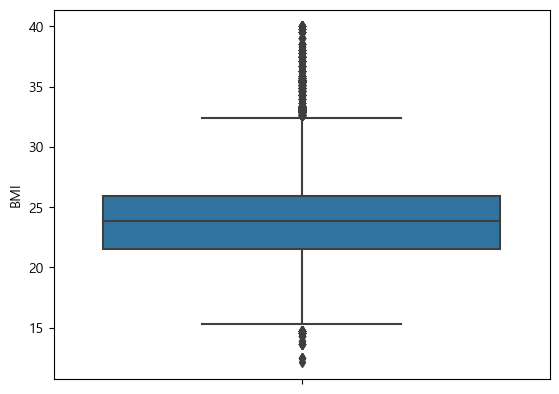

In [20]:
# 위에서 주어진 리스트를 그대로 사용
columns = [ 'IDV_ID', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']

# for 문을 사용하여 각각의 boxplot 그리기
for i in columns:
    sns.boxplot(y=i, data=dataNew3)
    plt.show()


### 기본적인 데이터 분석
- 남자 51%  여자 49%의 비율을 가진 데이터
- 평균 11.6의 나이대 그룹 [11그룹 : 50-54 , 12그룹 : 55-59]
- 평균 신장 : 161.52 cm
- 평균 무게 : 63kg
- 평균 시력 : 0.5
- 평균 흡연 여부 : 1.55 (평균적으로 흡연율이 낮음)
- 평균 음주 여부 : 0.6 (60%가 음주)
- 평균 충치 비율 : 0.16
- 평균 치석 비율 : 0.5832

C:\Users\wandong\AppData\Local\Temp\ipykernel_18832\2618471874.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataNew2.corr(),annot=True)


<Axes: >

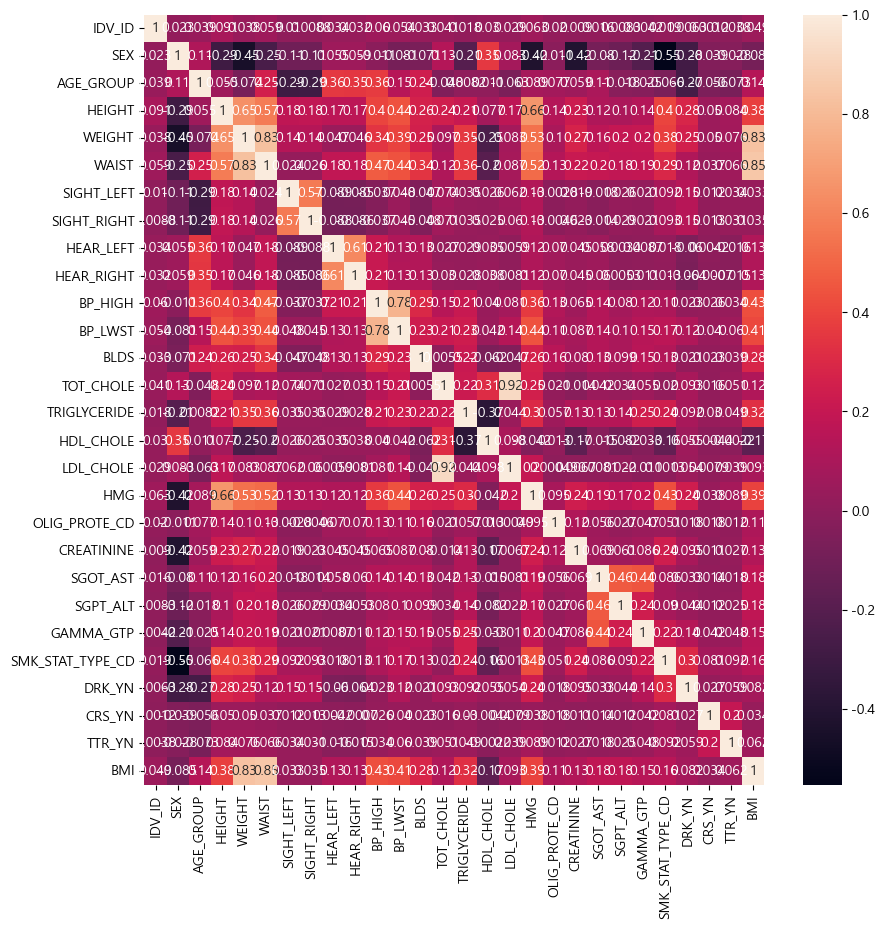

In [21]:
plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(dataNew2.corr(),annot=True)

### 변수간의 시각화 하기
- 논문에 근거하여서 시각화
- 연속형 vs 이산형은 산점도 아니면 합으로 바그래프

</br>

- 흡연여부와 크레아틴 -> 연속형
- 흡연여부와 맥박 및 혈압 -> 연속형
- 흡연여부와 콜레스테롤(LDL-C) -> 연속형
- 흡연여부와 헤모글로빈(HMG) -> 연속형
- 흡연여부와 gamma-GPT -> 연속형
- 흡연여부와 치석 -> 이산형
- 흡연여부와 충치 -> 이산형

## 9. index 재정렬 = dataNew4 / 최종데이터 = data


[최종변수]

1. 성별
2. 나이대
3. 허리둘레
4. 시력 좌우(2)
5. 청력 좌우(2)
6. 혈압(수축, 이완)(2)
7. 식전혈당
8. 총콜레스테롤
9. 트리글리세라이드
10. 콜레스테롤(HDL,LDL)(2)
11. 혈색소
12. 요단백
13. 혈청크레아티닌
14. 혈청지오티(AST,ALT)(2)
15. 감마지피티
16. 음주여부
17. 치아우식증(충치)
18. 치석
19. BMI

- 총 24개의 변수

In [22]:
Columns = [ 'SEX', 'AGE_GROUP',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']
dataNew4=dataNew3
dataNew4.reset_index(drop=False,inplace=True)
data=dataNew4[Columns]
data.describe()

,SEX,AGE_GROUP,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
count,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.0,83723.0,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.0,83723.000000,83723.000000,83723.000000,83723.000000,83723.000000,83723.0,83723.000000,83723.000000
mean,1.534011,11.491932,81.146423,0.477623,0.479366,1.0,1.0,121.892276,75.314107,99.185110,200.333552,117.576747,56.978871,120.005076,13.651529,1.0,0.268206,24.857040,23.121078,27.239194,0.604971,0.0,0.534190,23.961653
std,0.498845,2.052631,9.386271,0.507002,0.505873,0.0,0.0,14.117450,9.616228,13.575646,39.314135,63.848713,14.001689,35.823688,1.499482,0.0,0.445314,7.440674,11.543271,17.487601,0.488860,0.0,0.571273,3.416084
min,1.000000,9.000000,51.000000,0.000000,0.000000,1.0,1.0,76.000000,36.000000,44.000000,69.000000,7.000000,5.000000,6.000000,7.000000,1.0,0.000000,3.000000,1.000000,2.000000,0.000000,0.0,0.000000,12.110727
25%,1.000000,10.000000,74.000000,0.000000,0.000000,1.0,1.0,112.000000,69.000000,90.000000,174.000000,72.000000,47.000000,95.000000,13.000000,1.0,0.000000,20.000000,15.000000,15.000000,0.000000,0.0,0.000000,21.484375
50%,2.000000,11.000000,81.000000,0.000000,0.000000,1.0,1.0,120.000000,75.000000,97.000000,199.000000,102.000000,55.000000,119.000000,14.000000,1.0,0.000000,23.000000,20.000000,22.000000,1.000000,0.0,0.000000,23.875115
75%,2.000000,13.000000,87.000000,1.000000,1.000000,1.0,1.0,131.000000,81.000000,105.000000,226.000000,147.000000,65.000000,143.000000,15.000000,1.0,1.000000,28.000000,28.000000,33.000000,1.000000,0.0,1.000000,25.951557
max,2.000000,18.000000,125.000000,2.000000,2.000000,1.0,1.0,192.000000,118.000000,155.000000,384.000000,393.000000,122.000000,287.000000,20.000000,1.0,4.000000,60.000000,75.000000,104.000000,1.000000,0.0,2.000000,40.000000


In [23]:
dataNew4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83723 entries, 0 to 83722
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             83723 non-null  int64  
 1   IDV_ID            83723 non-null  int64  
 2   SEX               83723 non-null  int64  
 3   AGE_GROUP         83723 non-null  int64  
 4   HEIGHT            83723 non-null  int64  
 5   WEIGHT            83723 non-null  int64  
 6   WAIST             83723 non-null  float64
 7   SIGHT_LEFT        83723 non-null  float64
 8   SIGHT_RIGHT       83723 non-null  float64
 9   HEAR_LEFT         83723 non-null  float64
 10  HEAR_RIGHT        83723 non-null  float64
 11  BP_HIGH           83723 non-null  float64
 12  BP_LWST           83723 non-null  float64
 13  BLDS              83723 non-null  float64
 14  TOT_CHOLE         83723 non-null  float64
 15  TRIGLYCERIDE      83723 non-null  float64
 16  HDL_CHOLE         83723 non-null  float6

In [24]:
data

,SEX,AGE_GROUP,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
0,2,9,74.0,1.0,1.0,1.0,1.0,110.0,70.0,105.0,203.0,82.0,75.0,112.0,12.0,1.0,1.0,21.0,16.0,14.0,1.0,0.0,0.0,25.390625
1,1,13,76.0,1.0,1.0,1.0,1.0,126.0,76.0,96.0,182.0,97.0,86.0,76.0,14.0,1.0,0.0,21.0,16.0,59.0,1.0,0.0,0.0,24.221453
2,2,12,70.0,1.0,1.0,1.0,1.0,112.0,72.0,94.0,157.0,103.0,47.0,89.0,14.0,1.0,0.0,21.0,16.0,19.0,1.0,0.0,1.0,21.403092
3,1,13,94.0,1.0,1.0,1.0,1.0,120.0,78.0,109.0,246.0,121.0,55.0,167.0,15.0,1.0,1.0,21.0,16.0,28.0,1.0,0.0,2.0,25.711662
4,2,12,83.0,0.0,1.0,1.0,1.0,110.0,70.0,101.0,231.0,144.0,40.0,162.0,12.0,1.0,1.0,21.0,16.0,23.0,0.0,0.0,0.0,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83718,2,13,79.0,0.0,0.0,1.0,1.0,145.0,77.0,96.0,226.0,122.0,65.0,136.0,14.0,1.0,0.0,17.0,2.0,19.0,0.0,0.0,0.0,23.437500
83719,1,12,84.0,0.0,1.0,1.0,1.0,111.0,67.0,112.0,170.0,285.0,47.0,66.0,14.0,1.0,1.0,20.0,3.0,38.0,1.0,0.0,0.0,24.489796
83720,2,10,70.0,0.0,0.0,1.0,1.0,109.0,70.0,87.0,150.0,89.0,64.0,68.0,12.0,1.0,0.0,16.0,3.0,11.0,0.0,0.0,1.0,18.730489
83721,2,11,79.0,0.0,0.0,1.0,1.0,116.0,75.0,87.0,151.0,113.0,36.0,92.0,10.0,1.0,0.0,15.0,2.0,13.0,0.0,0.0,0.0,26.159334


In [25]:
target=dataNew4.iloc[:,24:25]
target

,SMK_STAT_TYPE_CD
0,1.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
83718,1.0
83719,1.0
83720,1.0
83721,1.0


## 10. 데이터나누기 (8:2)

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2,random_state=3535)
x_train

,SEX,AGE_GROUP,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
8026,2,9,54.0,1.0,1.0,1.0,1.0,115.0,80.0,89.0,200.0,48.0,72.0,118.0,13.0,1.0,0.0,27.0,17.0,13.0,1.0,0.0,1.0,17.578125
12381,2,14,80.0,0.0,0.0,1.0,1.0,138.0,85.0,87.0,215.0,126.0,104.0,85.0,14.0,1.0,0.0,15.0,15.0,17.0,0.0,0.0,0.0,21.403092
36984,2,10,76.0,1.0,0.0,1.0,1.0,116.0,72.0,79.0,283.0,153.0,48.0,204.0,13.0,1.0,0.0,25.0,22.0,16.0,1.0,0.0,0.0,24.444444
65332,2,13,83.0,0.0,0.0,1.0,1.0,139.0,83.0,115.0,195.0,215.0,52.0,100.0,12.0,1.0,0.0,20.0,31.0,40.0,1.0,0.0,0.0,23.437500
29913,2,10,72.0,0.0,0.0,1.0,1.0,118.0,76.0,83.0,165.0,42.0,59.0,98.0,12.0,1.0,0.0,20.0,13.0,20.0,1.0,0.0,1.0,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43439,2,12,76.0,0.0,0.0,1.0,1.0,111.0,81.0,88.0,148.0,92.0,59.0,71.0,14.0,1.0,0.0,22.0,23.0,24.0,1.0,0.0,1.0,24.973985
26769,2,11,78.0,1.0,1.0,1.0,1.0,111.0,70.0,98.0,215.0,98.0,85.0,110.0,13.0,1.0,0.0,25.0,20.0,36.0,1.0,0.0,0.0,22.892820
31112,2,10,60.0,1.0,1.0,1.0,1.0,110.0,56.0,89.0,152.0,49.0,60.0,82.0,12.0,1.0,0.0,16.0,13.0,13.0,1.0,0.0,1.0,19.531250
64765,1,13,81.0,0.0,1.0,1.0,1.0,118.0,76.0,155.0,134.0,96.0,52.0,63.0,14.0,1.0,1.0,24.0,31.0,46.0,1.0,0.0,0.0,25.390625


In [27]:
Y_train

,SMK_STAT_TYPE_CD
8026,1.0
12381,1.0
36984,1.0
65332,1.0
29913,1.0
...,...
43439,1.0
26769,1.0
31112,1.0
64765,2.0


## Random Forest 
- n_estimators = 100
- max_depth = 12
- min_samples_leaf = 10
- min_samples_split = 6

- accuracy = 0.7207

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train,Y_train)

rf_parameters ={'n_estimators':[10,100],'max_depth':[6,8,10,12],
            'min_samples_leaf':[4,6,8,10],'min_samples_split':[6,8,10,12]}
grid_rf = GridSearchCV(rf_clf,param_grid=rf_parameters,cv=3,refit=True)
grid_rf.fit(x_train,Y_train)

scores_rf_df = pd.DataFrame(grid_rf.cv_results_)
scores_rf_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.703544,127,0.698916,0.703171,0.708546
1,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.707635,96,0.705948,0.706934,0.710024
2,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.703544,127,0.698916,0.703171,0.708546
3,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.707635,96,0.705948,0.706934,0.710024
4,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.703679,126,0.698782,0.704112,0.708143
...,...,...,...,...,...,...
123,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.720147,1,0.720729,0.719968,0.719744
124,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.711293,57,0.708949,0.710875,0.714055
125,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.720147,1,0.720729,0.719968,0.719744
126,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.711293,57,0.708949,0.710875,0.714055


In [250]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

scores_rf_df[scores_rf_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
121,8.052471,2.376976,0.499849,0.228713,12,10,6,100,"{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 100}",0.720729,0.719968,0.719744,0.720147,0.000422,1
123,5.281437,0.033752,0.362603,0.033896,12,10,8,100,"{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 100}",0.720729,0.719968,0.719744,0.720147,0.000422,1
125,5.460532,0.501173,0.419552,0.082076,12,10,10,100,"{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}",0.720729,0.719968,0.719744,0.720147,0.000422,1
127,7.971921,1.381698,0.546490,0.140649,12,10,12,100,"{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 12, 'n_estimators': 100}",0.720729,0.719968,0.719744,0.720147,0.000422,1


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_leaf=10,min_samples_split=6)
rf_clf.fit(x_train,Y_train)
predict1=rf_clf.predict(x_test)
print(accuracy_score(Y_test,predict1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.725231412361899


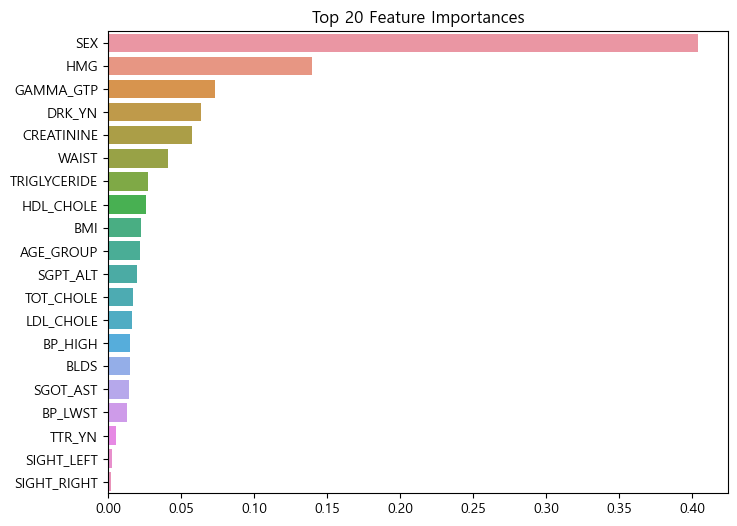

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()